# Defining the question

**a) Specifying the Data Analytic Question**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. As a data scientist i have been tasked to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**b) Defining the Metric for Success**

This project will be successful when:

1)We Identify the most crucial independent variables that affect Hypothyroidism.

2)The model achieves atleast 90% accuracy

3)Have the lowest RMSE score possible

**c) Understanding the context**

Hypothyrodism is a condition in which the thyroid gland doesn't produce enough thyroid hormone.
Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.
Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.
Treatment consists of thyroid hormone replacement.

**d) Recording the Experimental Design**

1. Exploratory Data Analysis

2. Data Cleaning

3. Univariate Analysis

4. Bivariate Analysis

5. Multivariate Analysis

6. Decision Trees: Random Forests , Ada Boosted Trees , Gradient Boosted Trees

7. Support Vector Machines: Kernel = polynomial , linear , rbf

8. Conclusion

# Reading the data

In [ ]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC,LinearSVC

In [ ]:
data= pd.read_csv('/content/hypothyroid.csv')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
data.shape

(3163, 26)

In [ ]:
# Checking the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
#Describing the data
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [ ]:
# checking for null values
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

The data set has no null values when searched used pyhton. But viewing the dataset there are some question marks

In [ ]:
# converting the question marks to nan
data = data.replace('?', np.nan)
data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

Dealing with null values

In [ ]:

#Ensuring that all data is the correct data type.
def create_null(X, columns):
  for i in columns:
    X[i] = pd.to_numeric(X[i], errors='coerce')
num_col=['age','TSH','T3','TT4','T4U','FTI']  

create_null(data, num_col)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [ ]:
# handling the null values
# We fill the missing values in the sex column with the mode
data.sex.fillna('F', inplace = True)
# For all the numerical columns we fill the missing values with the mean
num_col=['age','TSH','T3','TT4','T4U','FTI']
for column in num_col:
  data[column].fillna(data[column].mean(), inplace = True)
  
# Then drop TBG_Measured and TBG columns since TBG has a lot of missing values and may not be of help in our analysis.


data.drop(['TBG', 'TBG_measured'], axis = 1, inplace = True)

# confirming if the nulls are dropped
data.isnull().sum().any()

False

Checking for outliers

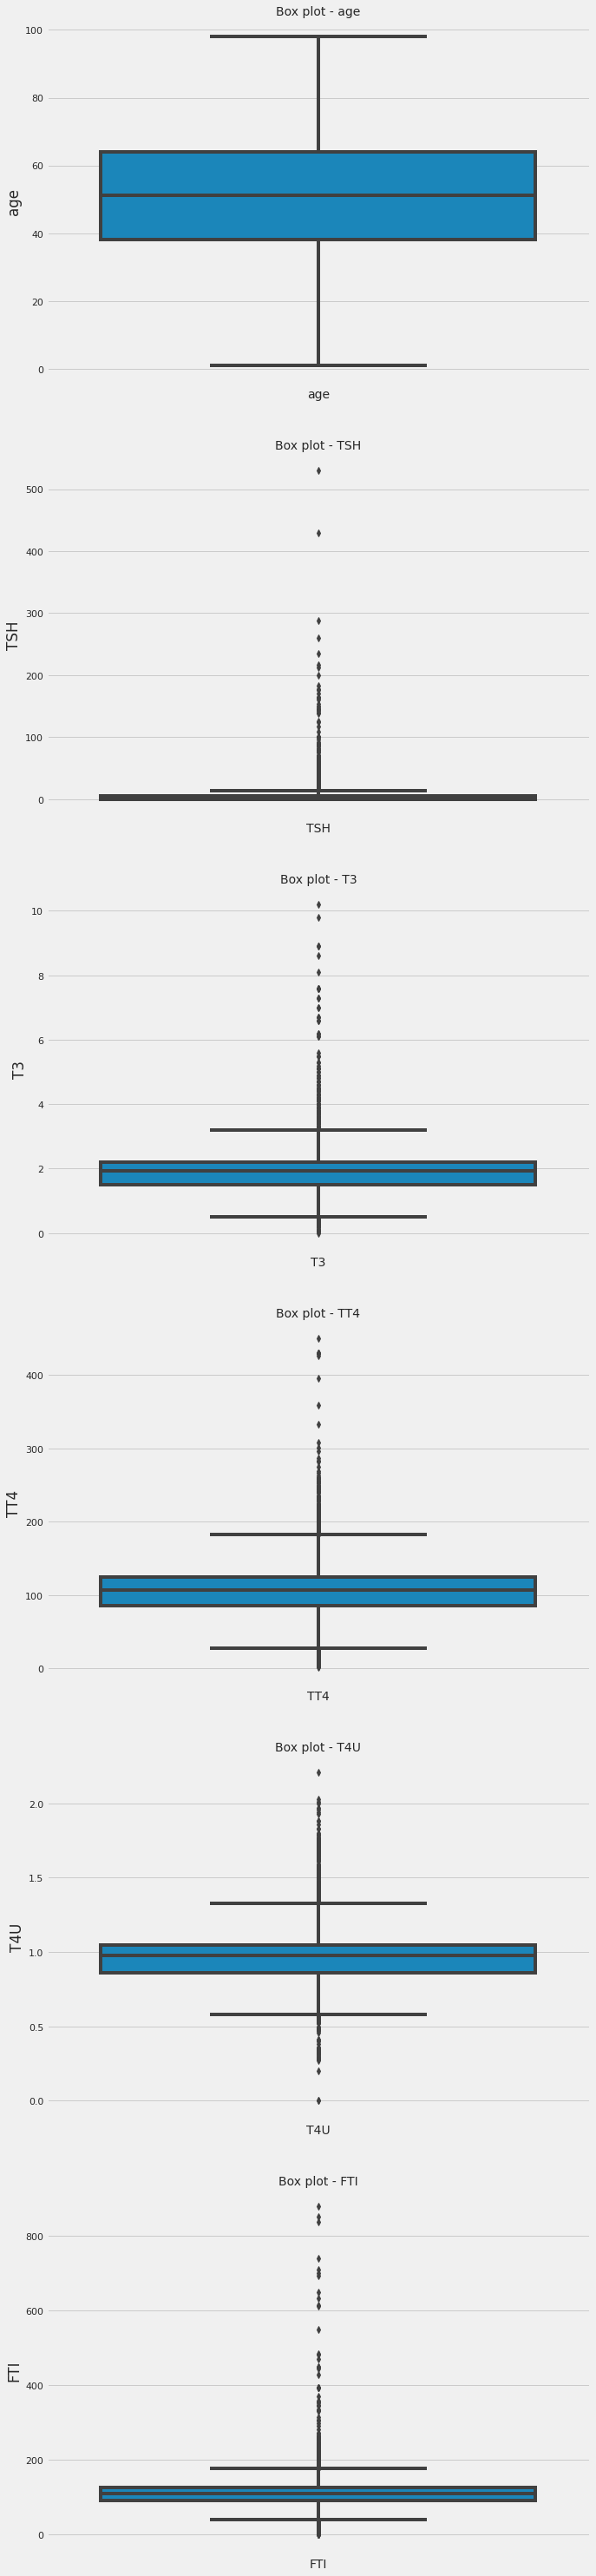

In [ ]:
# checking for outliers
def plot_boxplots(target_dataframe,num_col):
    
    fig, ax = plt.subplots(len(num_col), figsize=(10,50))
    
    for i, column_name in enumerate(num_col):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=14)
        ax[i].set_xlabel(column_name, fontsize=14)
    
    
outlier_columns =['age','TSH','T3','TT4','T4U','FTI']
plt.style.use('fivethirtyeight')
plot_boxplots(data,outlier_columns)
plt.show()

# Exploratory Analysis

## Univariate Analysis

In [ ]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771
std,17.881969,22.060029,0.880441,43.657766,0.217513,57.838927
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.154214,1.000000,1.939749,107.000000,0.978199,110.000000
75%,64.000000,5.923180,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

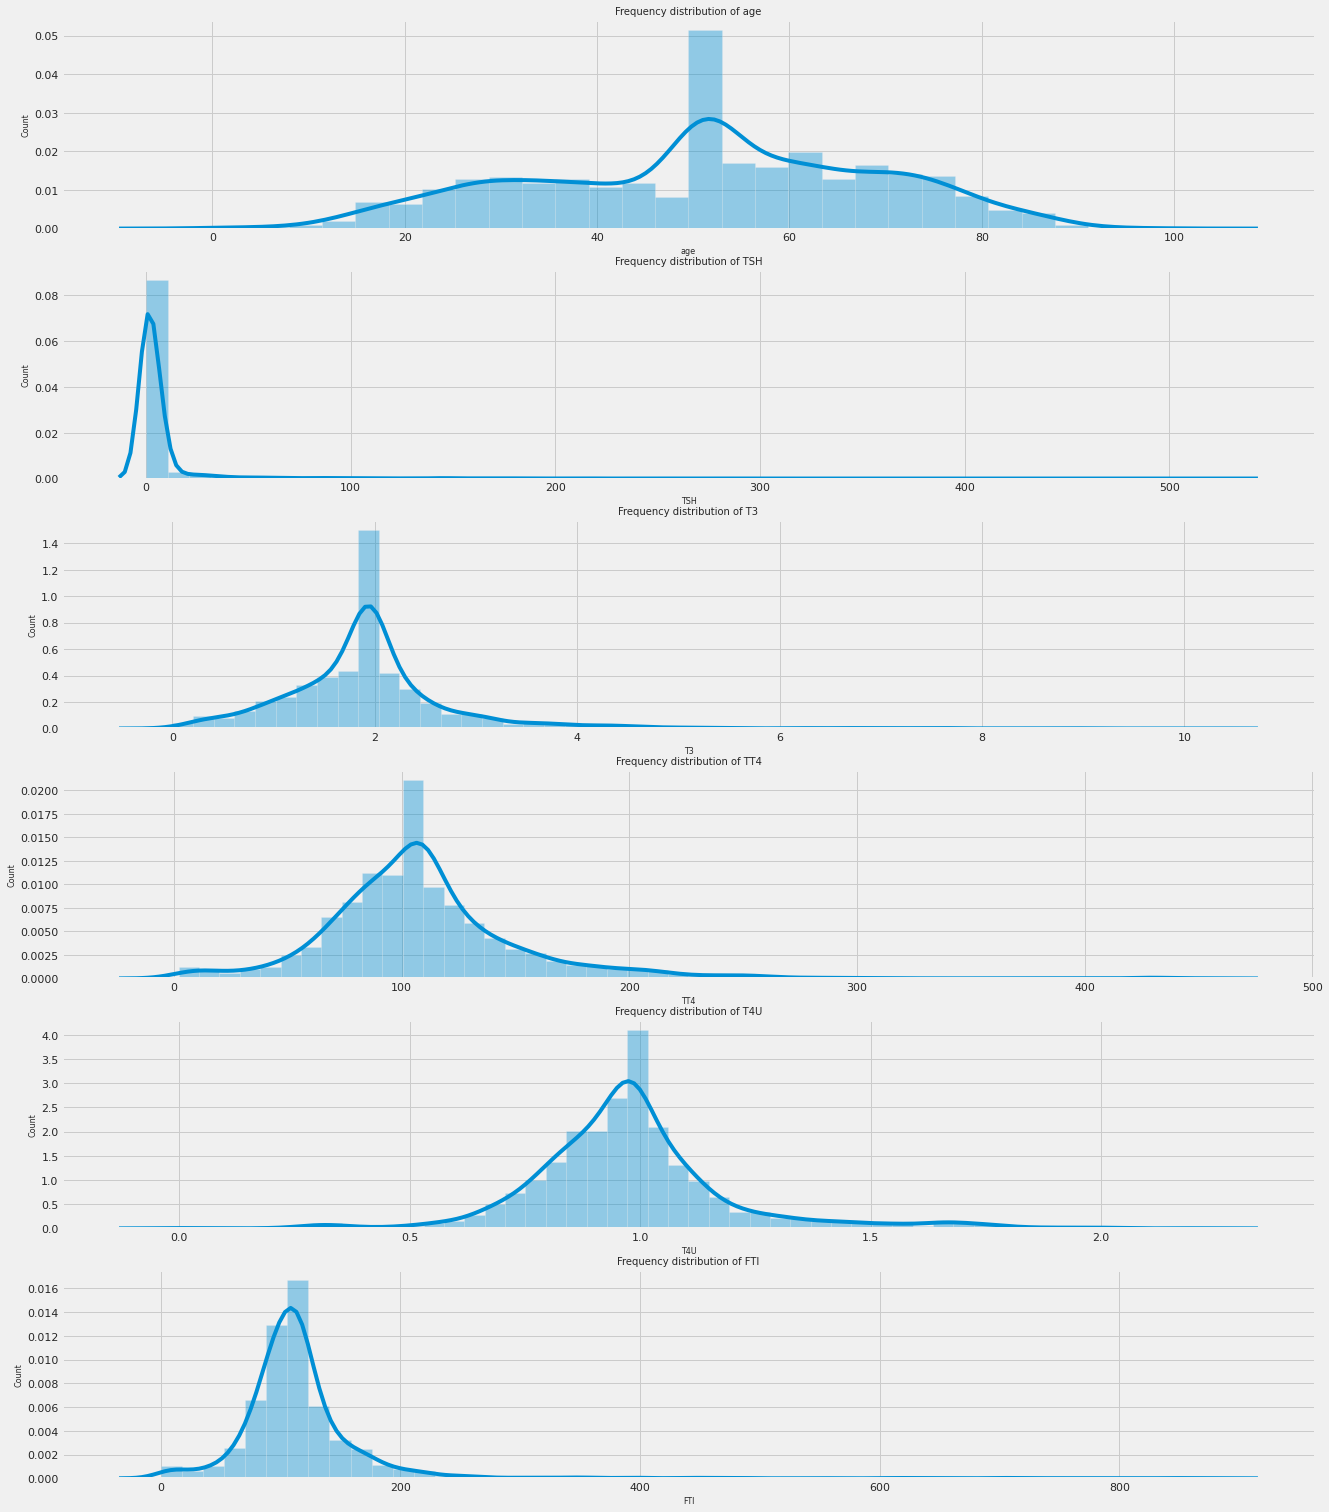

In [ ]:
# distribution of numerical variables.

fig, ax = plt.subplots(len(num_col), figsize=(20,25))

for i, col_val in enumerate(num_col):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()

Text(0.5, 0, 'status')

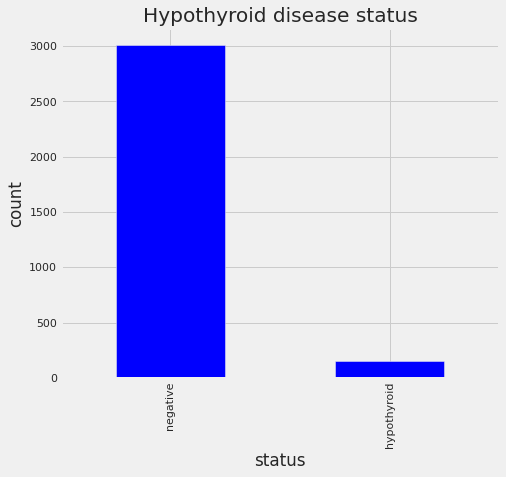

In [ ]:
#Distribution of the disease status.
data['status'].value_counts().plot.bar(title='Hypothyroid disease status', color = 'blue')
plt.ylabel('count')
plt.xlabel('status')

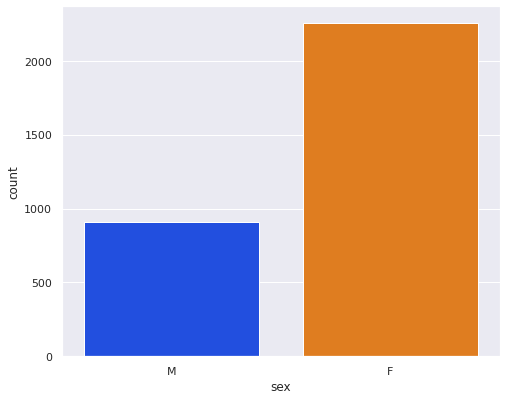

In [ ]:
# frequency of the sex column
sns.set(rc={'figure.figsize':(7, 6)})
sns.set(style="darkgrid")
sns.countplot(x="sex", data=data, palette='bright')

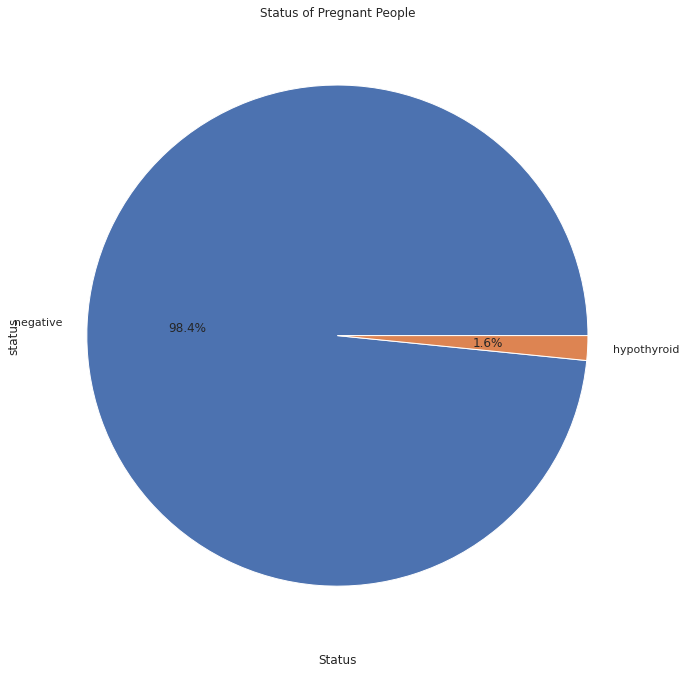

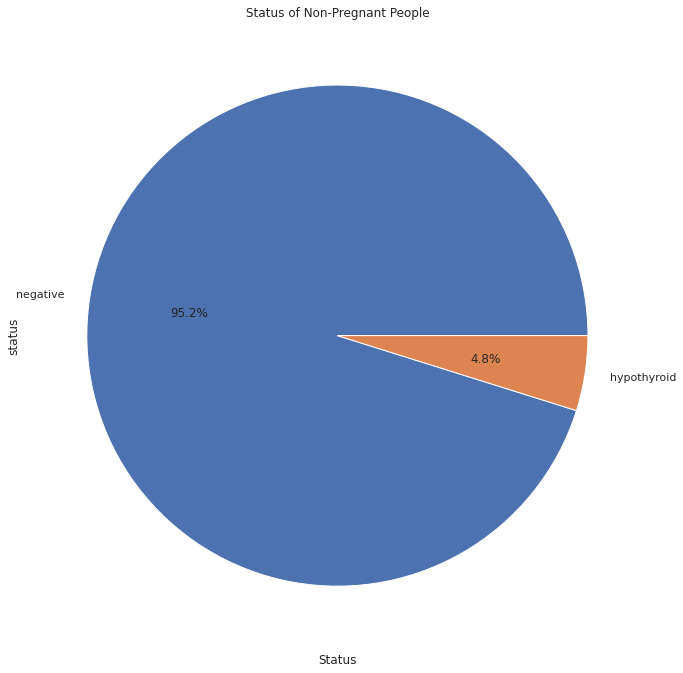

In [ ]:
# distribution of status of the patients who are pregnant and those who are not.

# Pregnant 
fig, ax = plt.subplots(figsize = (10, 20))
data[data['pregnant'] == 't']['status'].value_counts().plot(kind='pie',autopct='%0.1f%%', title = 'Status of Pregnant People')
plt.xlabel('Status')
plt.show()

# Not pregnant
fig, ax = plt.subplots(figsize = (10, 20))
data[data['pregnant'] == 'f']['status'].value_counts().plot(kind='pie',autopct= '%0.1f%%',title = 'Status of Non-Pregnant People')
plt.xlabel('Status')
plt.show()

1.6% of pregnant are positive while 4.8% of non pregnant women are positive. this shows that the disease mostly affects non pregnant women. 

## Bivariate Analysis

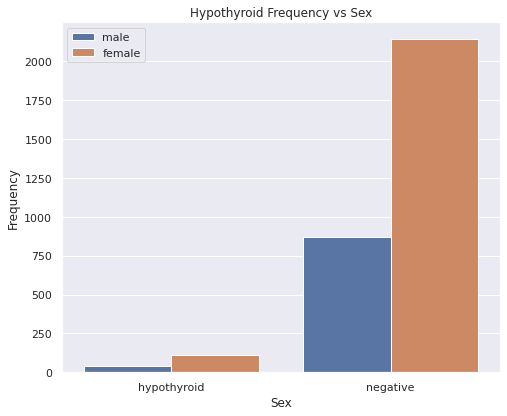

In [ ]:
#Bar plot of sex vs status
ax = sns.countplot(x=data['status'], hue=data['sex'],data=data,orient="h", alpha=1)
plt.title('Hypothyroid Frequency vs Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["male", "female"])
plt.ylabel('Frequency')
plt.show()

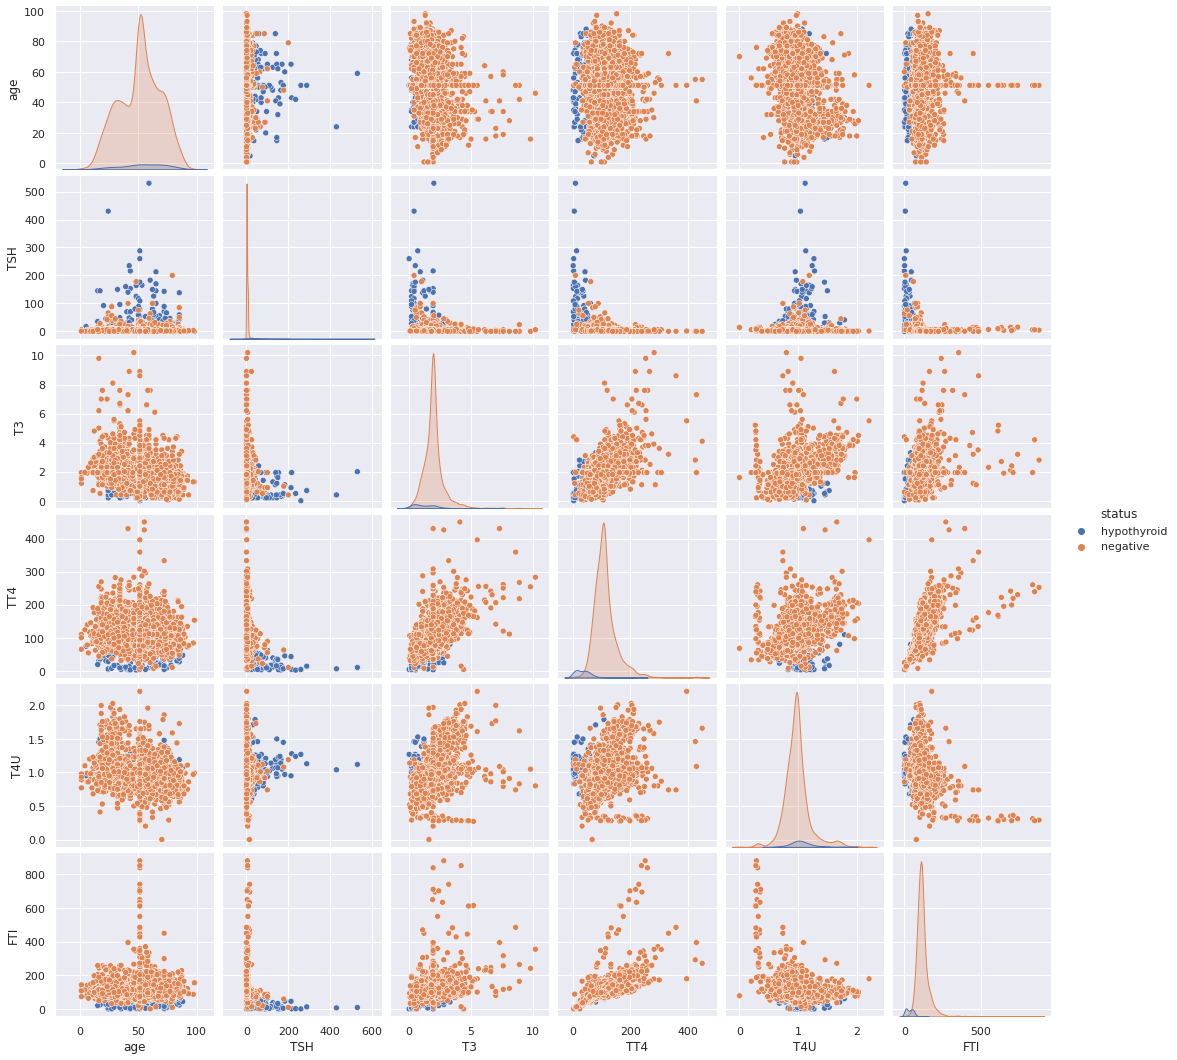

In [ ]:
# Checking for correlation between variables.

variables = ['age','TSH','T3','TT4','T4U','FTI']

sns.pairplot(data, kind="scatter", diag_kind="kde", vars=variables, hue="status")
plt.show()

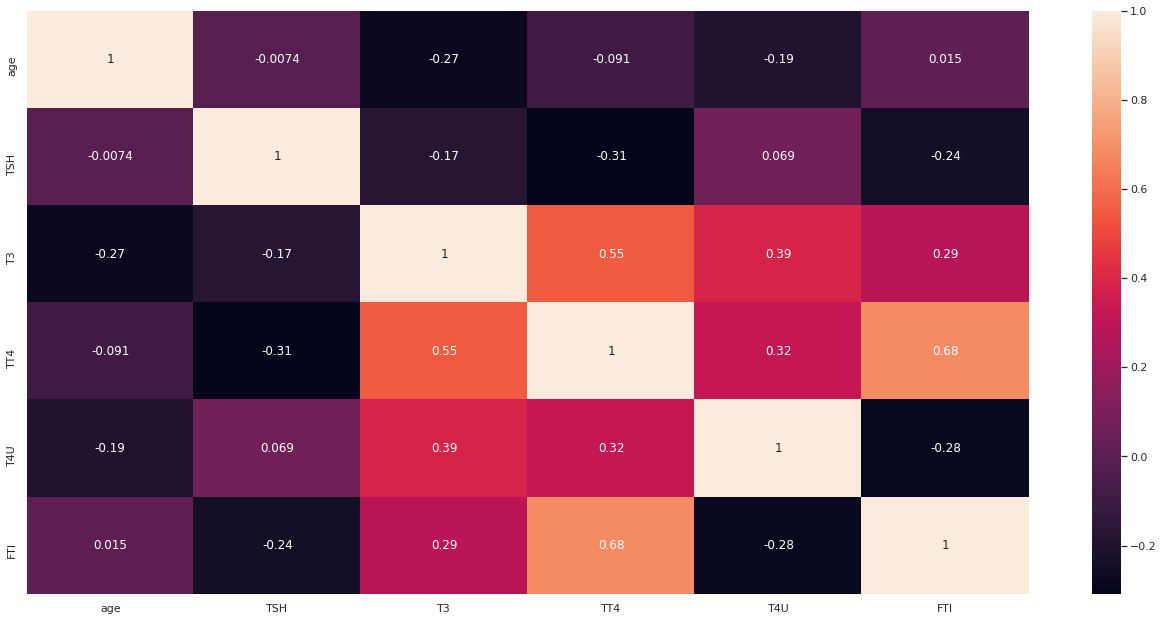

In [ ]:
#visualizing the correlation between features
plt.figure(figsize=(20, 10))
corr = data.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

# Implementing the solution

In [ ]:

#Separating features and labels /preprocessing
X = data[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']].values
y = data["status"].values

In [ ]:
#Split the data into a training set and testing set.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:

# Create a dictionary to manually encode the categorical data
dict_data = {"sex": {"M": 1, "F": 0},
             'status':{"negative":0,'hypothyroid':1},
              'on_thyroxine': {"t": 1, "f": 0},
               "query_on_thyroxine": {"t": 1, "f": 0},
                "on_antithyroid_medication": {"t": 1, "f": 0},
                "thyroid_surgery": {"t": 1, "f": 0},
                "query_hypothyroid": {"t": 1, "f": 0},
               "query_hyperthyroid": {"t": 1, "f": 0},
                "pregnant": {"t": 1, "f": 0},
                "sick" : {"t": 1, "f": 0},
                "tumor": {"t": 1, "f": 0},
                "lithium": {"t": 1, "f": 0},
                "goitre": {"t": 1, "f": 0},
                 "TSH_measured": {"y": 1, "n": 0},
                 "T3_measured": {"y": 1, "n": 0},
                  "TT4_measured": {"y": 1, "n": 0},
                  "T4U_measured": {"y": 1, "n": 0},
                  "FTI_measured": {"y": 1, "n": 0},
                  "TBG_measured": {"y": 1, "n": 0},
                }
data.replace(dict_data, inplace=True)

# Decision Trees

Randon decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = data['status'].values
data.columns

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']
X = data[test_features].values
# importing the random forest regressor
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 200, min_samples_split = 20,
                              max_depth = 5)

# fitting our model to our training data
forest.fit(X_train, y_train)

# make predictions using our forest
y_pred_rand = forest.predict(X_test)

In [ ]:
# compare actual values with predicted values
compare = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_rand})
compare.describe()

In [ ]:
# Visualising the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# Visualizing a tree from the random forest
y_pred_rand = forest.predict(X_test)
dot_data = StringIO()

# picks a specific tree from the forest
tree = forest.estimators_[20]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [ ]:
# Finding the importance levels of our features
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(test_features, importances)]

# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances

In [ ]:
# Visualizing

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_rand))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_rand))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_rand)))

In [ ]:
print("R2 score : %.2f" % r2_score(y_test,y_pred_rand))
print('accuracy_score:',accuracy_score (y_test , y_pred_rand))


#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, y_pred_rand, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_rand, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_rand, average='weighted'))

Random forest model got Root Mean Squared Error of 0.12720546282869608 whis is low and an accuracy score of 98.38% which is good for predictions.

#Adaboost

In [ ]:

from sklearn.ensemble import AdaBoostRegressor

ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state = 0)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)


# comparing actual values to predicted values
ada_boost = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred_ada})

# previewing our summary statistics
ada_boost.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.041074,0.065179
std,0.198619,0.173600
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.007194
max,1.000000,0.882171


In [ ]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

Mean Absolute Error: 0.052300520219515416
Mean Squared Error: 0.021458826561385515
Root Mean Squared Error: 0.14648831544319674


Ada boost got RMSE of 0.19294405447108925 and an accuracy score of 98.22% slightly below random forest

# Gradient boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# setting different learning rates, so that we can compare the performance of 
# the classifier's performance at different learning rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    grad = GradientBoostingClassifier(n_estimators = 200, max_depth = 2,
                                     learning_rate = learning_rate,
                                     random_state = 0)
    grad.fit(X_train, y_train)

    print("Learning rate:", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(grad.score(X_train,y_train)))                                                               
    print("Accuracy score (validation): {0:.3f}".format(grad.score(X_test,y_test)))

Learning rate: 0.05
Accuracy score (training): 0.997
Accuracy score (validation): 0.987
Learning rate: 0.075
Accuracy score (training): 0.999
Accuracy score (validation): 0.984
Learning rate: 0.1
Accuracy score (training): 0.999
Accuracy score (validation): 0.984
Learning rate: 0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.984
Learning rate: 0.5
Accuracy score (training): 0.998
Accuracy score (validation): 0.983
Learning rate: 0.75
Accuracy score (training): 0.981
Accuracy score (validation): 0.981
Learning rate: 1
Accuracy score (training): 0.981
Accuracy score (validation): 0.981


In [ ]:
# Using selected learning rate to model
grad2 = GradientBoostingClassifier(n_estimators = 200, max_depth = 2, 
                                  learning_rate = 0.1, random_state = 0)

# fitting to training data
grad2.fit(X_train, y_train)

# making predictions
grad2_y_pred = grad2.predict(X_test)

# comparing actual values to predicted values
grad2_compare = pd.DataFrame({'Actual' : y_test,'Predicted' : grad2_y_pred})
                        
# previewing our summary statistics
grad2_compare.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.041074,0.047393
std,0.198619,0.212647
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [ ]:
# Checking the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grad2_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grad2_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grad2_y_pred)))

Mean Absolute Error: 0.01579778830963665
Mean Squared Error: 0.01579778830963665
Root Mean Squared Error: 0.12568925295997527


In [ ]:
print("R2 score : %.2f" % r2_score(y_test,grad2_y_pred))
print('accuracy_score:',accuracy_score (y_test , grad2_y_pred))
#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, grad2_y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, grad2_y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, grad2_y_pred, average='weighted'))

R2 score : 0.60
accuracy_score: 0.9842022116903634
F1_score, average = micro: 0.9842022116903634
F1_score, average = macro: 0.906582054309327
F1_score, average = weighted: 0.9847403063689149


Gradient boosting has an RMSE of 0.10642772590553623 and accuracy score of 98.86%.It has performed slightly better than random forest and ada boost

# SVM 

In [ ]:
# Here we will use Randomized search to find the best parameters for the model
# Creating a dictionary
# Specifying the parameters we want to tune

params = {'C': [0.001, 0.01, 0.1, 1, 10],
          'gamma': [0.001, 0.01, 0.1, 1]}

svc = SVC()

search = RandomizedSearchCV(estimator = svc, 
                      param_distributions = params, 
                      scoring = 'accuracy',
                      n_jobs = 1, 
                      cv = 10 )
                
                
search.fit(X,y)
search.best_params_

{'C': 10, 'gamma': 0.001}

# Linear Kernel Function

In [ ]:
# importing our SVM model and setting kernel to linear

from sklearn.svm import SVC
# Building the svm model with default parametres.
#
linear_model = SVC(kernel = 'linear',C= 10, gamma= 0.001 )
# Train the model using the training set
#
linear_model.fit(X_train,y_train)
# Predict the response for the test set
linear_y_pred = linear_model.predict(X_test)
linear_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# assessing the model
from sklearn.metrics import confusion_matrix, accuracy_score

print("Linear kernel score:", accuracy_score(y_test, linear_y_pred))
print("Linear kernel confusion matrix:\n", confusion_matrix(y_test, linear_y_pred))

Linear kernel score: 0.9731437598736177
Linear kernel confusion matrix:
 [[599   8]
 [  9  17]]


In [ ]:
print(classification_report(y_test,linear_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       607
           1       0.68      0.65      0.67        26

    accuracy                           0.97       633
   macro avg       0.83      0.82      0.83       633
weighted avg       0.97      0.97      0.97       633



# Polynomial Kernel function

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',C= 10, gamma= 0.001 )
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred_poly = polyclassifier.predict(X_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred_poly))
print(confusion_matrix(y_test, y_pred_poly))

0.9794628751974723
[[603   4]
 [  9  17]]


In [ ]:
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       607
           1       0.81      0.65      0.72        26

    accuracy                           0.98       633
   macro avg       0.90      0.82      0.86       633
weighted avg       0.98      0.98      0.98       633



The average precision is 0.92
The SVC model using polynomial kernel yielded 95.95% accuracy, the linear kernel performed better

# Radial basis function

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf',C= 10, gamma= 0.001 )
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

0.9794628751974723
[[599   8]
 [  5  21]]


In [ ]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       607
           1       0.72      0.81      0.76        26

    accuracy                           0.98       633
   macro avg       0.86      0.90      0.88       633
weighted avg       0.98      0.98      0.98       633



The average precision is 0.98
The SVC model using rbf kernel yielded 98.22% accuracy, the linear kernel still has a better score.

# Challenging the solution 

Challenging the solution using the sigmoid function 

In [ ]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid',C= 10, gamma= 0.001)
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred_sig = sigclassifier.predict(X_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred_sig))
print(confusion_matrix(y_test, y_pred_sig))

0.9589257503949447
[[607   0]
 [ 26   0]]


The sigmoid has perfomed better than polynomial and the rbf.

# Conclusion 


From the above analysis we conclude that all our models performed well since they all had low RMSE and accuracy scores of above 90%. But since our analysis is on thyroid patients we would like to go with the best score since we dealing with human life. Hence in decision trees we would recommend the Gradient boosting model while in the SVM we go with the linear kernel for best predictions.